<a href="https://colab.research.google.com/github/seongcho1/dslr-data/blob/master/42_dslr(on)_%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8%E1%84%8B%E1%85%AD%E1%86%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
* 최초 작성일 : 2022.12.05
* 최종 수정일 : 2022.12.12
---

#**1.개요 및 데이터 불러오기**

##**1-1.개요**

 * 로지스틱 회귀를 이용한 분류?

    * 독립 변수(X)와 종속 변수 (Y)의 관계를 구해내는 선형 회귀 분석과 유사하나, 종속 변수가 범주로 구성된 데이터를 대상으로 한다는 차이가 있다.

 * 실습목표
   * sorting hat이 고장났다. 이를 대신할 로지스틱 회귀 분석을 수행한다.
   * 탐색적 데이터 분석 및 시각화를 통하여 데이터의 특성을 파악한다. 
   * 머신러닝 알고리즘 중 경사하강법을 사용한다.
   * 종속 변수 Y의 범주 : Categories (4): ['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin']
   * 보너스: describe에 추가 정보, 통계적 경사하강법 구현, 경사하강법 알고리즘 최적화 (배치 경사하강법, 미니-배치 경사하강법)

 * 실습내용
   * 분석 데이터 로드, 탐색적 데이터 분석(EDA), 시각화를 통한 데이터 특성 파악.
   * 데이터 분리(train, test)    
   * 신입생 하우스 분류 모델 구성 및 학습.

 * 실습 데이터

   * 신입생 데이터의 각 컬럼은 문자열 데이터와 숫자 데이터로 크게 구분할 수 있다. 
   * 문자열 데이터에서 뽑아 낼수 있는 의미있는 정보에 대해서 생각해 보자.
   * 라벨데이터는 Hogwarts House 컬럼으로 부터 얻을 수 있다.  

* 데이터 구성

  * 데이터는 dataset_train.csv파일에서 얻을 수 있으며 19개의 columns과 1600개의 rows로 구성 되어 있다.

| #  | Column                       |  Non-Null Count | Dtype  |
|--- | ------                       |  -------------- | -----  |
| 0  | Index                        |  1600 non-null  | int64  |
| 1  | Hogwarts House               | 1600 non-null   | object |
| 2  | First Name                   |  1600 non-null  | object |
| 3  | Last Name                    |  1600 non-null  | object |
| 4  | Birthday                     |  1600 non-null  | object |
| 5  | Best Hand                    |  1600 non-null  | object |
| 6  | Arithmancy                   |  1566 non-null  | float64|
| 7  | Astronomy                    |  1568 non-null  | float64|
| 8  | Herbology                    |  1567 non-null  | float64|
| 9  | Defense Against the Dark Arts|  1569 non-null  | float64|
| 10 | Divination                   |  1561 non-null  | float64|
| 11 | Muggle Studies               |  1565 non-null  | float64|
| 12 | Ancient Runes                |  1565 non-null  | float64|
| 13 | History of Magic             |  1557 non-null  | float64|
| 14 | Transfiguration              |  1566 non-null  | float64|
| 15 | Potions                      |  1570 non-null  | float64|
| 16 | Care of Magical Creatures    |  1560 non-null  | float64|
| 17 | Charms                       |  1600 non-null  | float64|
| 18 | Flying                       |  1600 non-null  | float64|






In [8]:
#data clone
#!git clone https://github.com/seongcho1/dslr
!git clone https://github.com/seongcho1/dslr-data

fatal: destination path 'dslr-data' already exists and is not an empty directory.


In [10]:
#자주 사용하는 라이브러리 임포트 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#소숫점 자리수 표시 방법 지정 
pd.options.display.float_format = '{:.5f}'.format

#경고메세지 제거 
import warnings
warnings.filterwarnings('ignore')

## 1-2. 데이터 불러오기

In [11]:
# 데이터 불러오기
location = "./dslr-data/datasets/dataset_train.csv"

df = pd.read_csv(location, header=0)
df.head()

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.00000,-487.88609,5.72718,4.87886,4.72200,272.03583,532.48423,5.23106,1039.78828,3.79037,0.71594,-232.79405,-26.89000
1,1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.00000,-552.06051,-5.98745,5.52061,-5.61200,-487.34056,367.76030,4.10717,1058.94459,7.24874,0.09167,-252.18425,-113.45000
2,2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.00000,-366.07612,7.72502,3.66076,6.14000,664.89352,602.58528,3.55558,1088.08835,8.72853,-0.51533,-227.34265,30.42000
3,3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.00000,697.74281,-6.49721,-6.97743,4.02600,-537.00113,523.98213,-4.80964,920.39145,0.82191,-0.01404,-256.84675,200.64000
4,4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,60158.00000,436.77520,-7.82062,NaN,2.23600,-444.26254,599.32451,-3.44438,937.43472,4.31107,-0.26407,-256.38730,157.98000


##1-3.데이터 확인




* 데이터셋 정보 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Index                          1600 non-null   int64  
 1   Hogwarts House                 1600 non-null   object 
 2   First Name                     1600 non-null   object 
 3   Last Name                      1600 non-null   object 
 4   Birthday                       1600 non-null   object 
 5   Best Hand                      1600 non-null   object 
 6   Arithmancy                     1566 non-null   float64
 7   Astronomy                      1568 non-null   float64
 8   Herbology                      1567 non-null   float64
 9   Defense Against the Dark Arts  1569 non-null   float64
 10  Divination                     1561 non-null   float64
 11  Muggle Studies                 1565 non-null   float64
 12  Ancient Runes                  1565 non-null   f

* 데이터 형태 및 요약정보 확인

In [ ]:
#데이터 행과 열
print(df.shape)

#데이터 요약 정보 
df.describe(include='all').T

(1600, 19)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Index,1600.00000,NaN,NaN,NaN,799.50000,462.02453,0.00000,399.75000,799.50000,1199.25000,1599.00000
Hogwarts House,1600,4,Hufflepuff,529,NaN,NaN,NaN,NaN,NaN,NaN,NaN
First Name,1600,1215,Tiffany,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Name,1600,1378,Stewart,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Birthday,1600,1065,1998-06-12,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Best Hand,1600,2,Right,810,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arithmancy,1566.00000,NaN,NaN,NaN,49634.57024,16679.80604,-24370.00000,38511.50000,49013.50000,60811.25000,104956.00000
Astronomy,1568.00000,NaN,NaN,NaN,39.79713,520.29827,-966.74055,-489.55139,260.28945,524.77195,1016.21194
Herbology,1567.00000,NaN,NaN,NaN,1.14102,5.21968,-10.29566,-4.30818,3.46901,5.41918,11.61290
Defense Against the Dark Arts,1569.00000,NaN,NaN,NaN,-0.38786,5.21279,-10.16212,-5.25910,-2.58934,4.90468,9.66741


* 데이터 null값 확인

In [ ]:
#데이터 null값 확인(합계) 
df.isnull().sum()

Index                             0
Hogwarts House                    0
First Name                        0
Last Name                         0
Birthday                          0
Best Hand                         0
Arithmancy                       34
Astronomy                        32
Herbology                        33
Defense Against the Dark Arts    31
Divination                       39
Muggle Studies                   35
Ancient Runes                    35
History of Magic                 43
Transfiguration                  34
Potions                          30
Care of Magical Creatures        40
Charms                            0
Flying                            0
dtype: int64

# **2. 데이터 탐색** <br>

---
데이터 탐색 파트는 아래 순서로 진행됨<br>
2-1. 분포 확인<br>
2-2. 종속변수 생성<br>

---

## 2-1. 분포확인

* 시각화 및 분석을 위한 컬럼명 변수저장

In [14]:
# 시각화를 위한 컬럼명 변수저장
# 독립변수 데이터컬럼 리스트 초기화
data_cols = []

# 독립변수 데이터컬럼 길이 초기화
len_of_data_cols = 0

for col in df.columns:
    if(col != 'Index' and col != 'Hogwarts House'):
      data_cols.append(col)
      len_of_data_cols += 1
print('data_cols : ',data_cols)
print(len_of_data_cols)

# 종속변수 레이블컬럼 리스트
label = ['Hogwarts House']
print('label : ',label)

data_cols :  ['First Name', 'Last Name', 'Birthday', 'Best Hand', 'Arithmancy', 'Astronomy', 'Herbology', 'Defense Against the Dark Arts', 'Divination', 'Muggle Studies', 'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions', 'Care of Magical Creatures', 'Charms', 'Flying']
17
label :  ['Hogwarts House']


* 데이터 의 분포

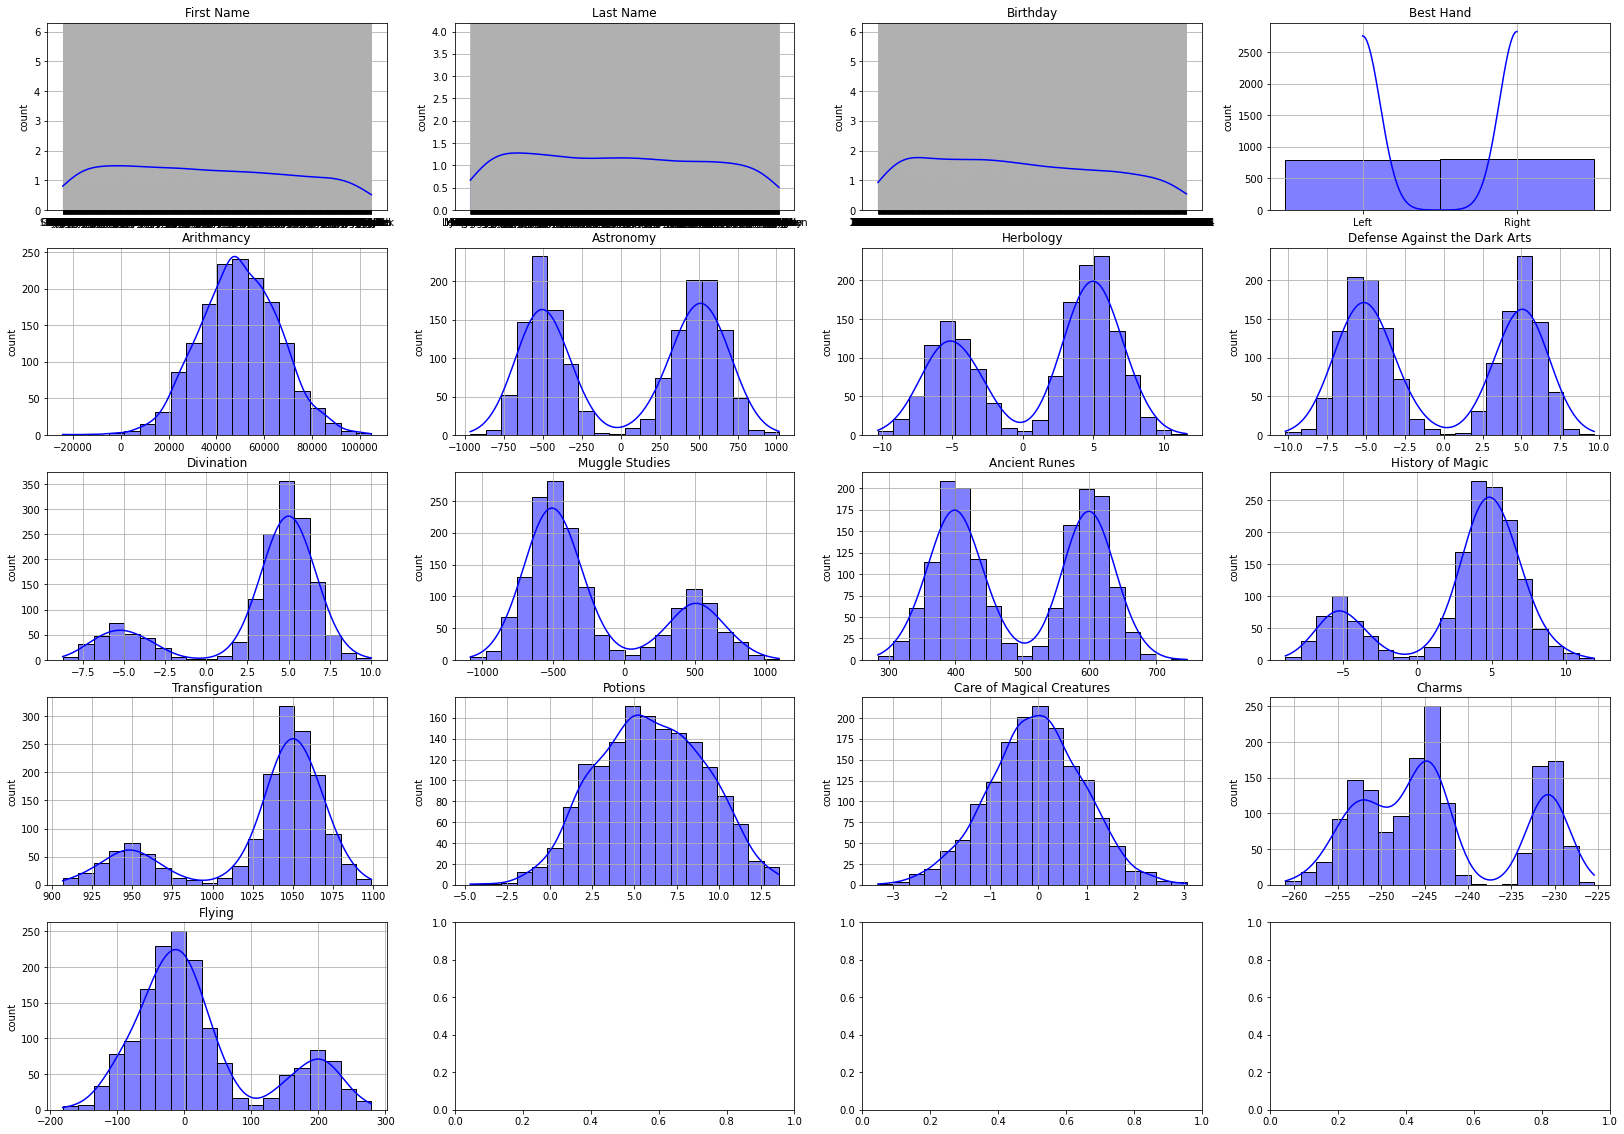

In [ ]:
#문자열 컬럼 4개, 숫자 컬럼 13개
f, axes = plt.subplots(5, 4, figsize=(28, 20))
col_no = 0
for x in range(0,5):
    for y in range(0,4):
        if (col_no < len_of_data_cols):
          ax = sns.histplot(df[data_cols[col_no]], bins=20,  color="blue", alpha=0.5, kde=True, ax=axes[x, y])
          ax.grid(b=True)
          ax.set(xlabel="",ylabel="count" ,title=data_cols[col_no])
          col_no +=1
        

* 레이블의 분포

,Hufflepuff,Ravenclaw,Gryffindor,Slytherin
Hogwarts House,529,443,327,301


([<matplotlib.patches.Wedge at 0x7f818fcf8a30>,
 [Text(0.5580854169175661, 0.94791385021211, 'Ravenclaw'),
  Text(-1.079283082995841, 0.2124806503166644, 'Slytherin'),
  Text(-0.27565042838524706, -1.0649022684411138, 'Gryffindor'),
  Text(0.9134148094372827, -0.6129220063765476, 'Hufflepuff')],
 [Text(0.30441022740958146, 0.5170439182975145, '33%'),
  Text(-0.5886998634522769, 0.1158985365363624, '28%'),
  Text(-0.15035477911922565, -0.580855782786062, '20%'),
  Text(0.4982262596930632, -0.33432109438720775, '19%')])

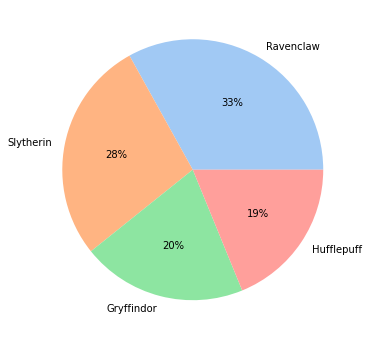

In [ ]:
labels = df[label[0]].unique()
value_df = pd.DataFrame(df[label[0]].value_counts())
display(value_df.T)

plt.figure(figsize = (6, 6))
colors = sns.color_palette('pastel')[0:5]
#create pie chart
plt.pie(value_df.T, labels = labels, colors = colors, autopct='%.0f%%')

* 각 필드별 boxplot  

['First Name', 'Last Name', 'Birthday', 'Best Hand', 'Arithmancy', 'Astronomy', 'Herbology', 'Defense Against the Dark Arts', 'Divination', 'Muggle Studies', 'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions', 'Care of Magical Creatures', 'Charms', 'Flying']
17
['Astronomy', 'Herbology', 'Defense Against the Dark Arts', 'Divination', 'Muggle Studies', 'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions', 'Care of Magical Creatures', 'Charms', 'Flying']


(array([0]), <a list of 1 Text major ticklabel objects>)

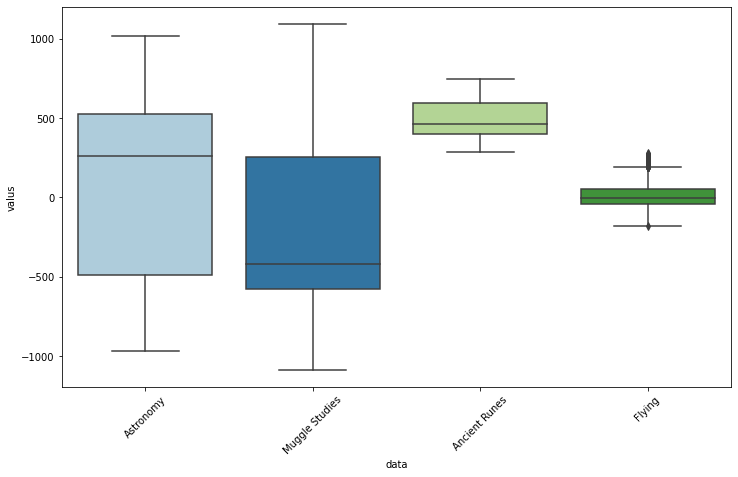

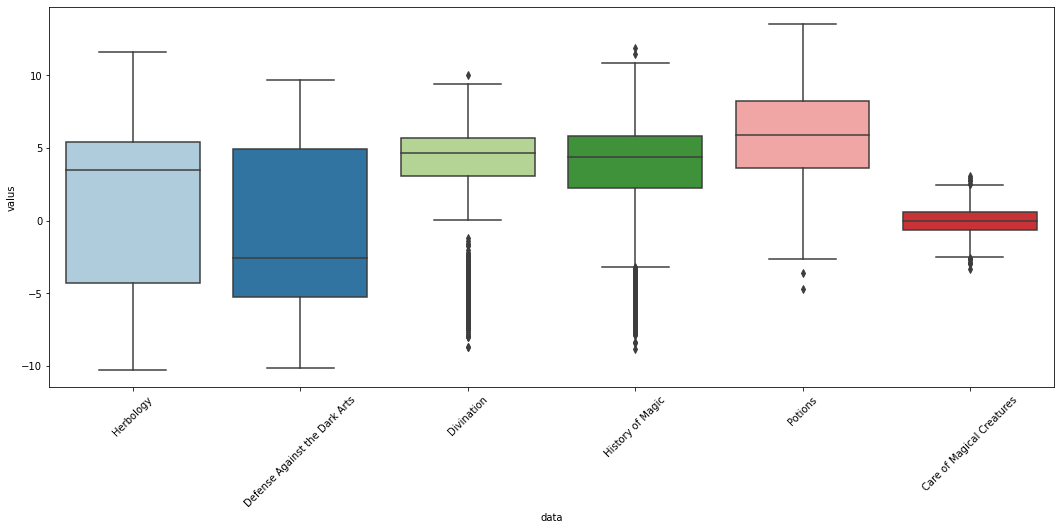

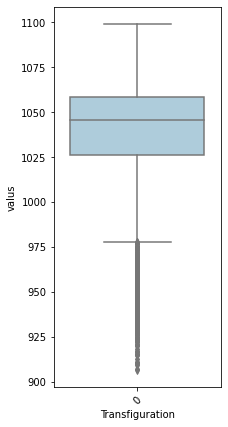

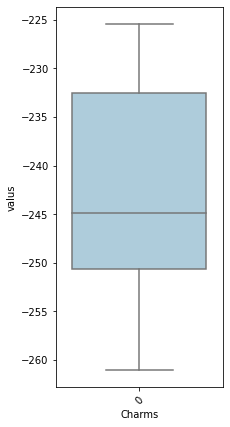

In [ ]:
# 17개 데이터 컬럼별 의 boxplot
# value range가 비슷한 4개의 그룹으로 구분하여 시각화

print(data_cols)
print(len(data_cols))
print(data_cols[5:17])

plt.figure(figsize = (12, 7))
ax = sns.boxplot(data=df[[data_cols[5], data_cols[9], data_cols[10], data_cols[16]]], palette = 'Paired')
ax.set(xlabel="data", ylabel="valus")
plt.xticks(rotation=45)

plt.figure(figsize = (18, 7))
ax = sns.boxplot(data=df[[data_cols[6], data_cols[7], data_cols[8], data_cols[11], data_cols[13], data_cols[14]]], palette = 'Paired')
ax.set(xlabel="data", ylabel="valus")
plt.xticks(rotation=45)


plt.figure(figsize = (3, 7))
ax = sns.boxplot(data=df[data_cols[12]], palette = 'Paired')
ax.set(xlabel=data_cols[12], ylabel="valus")
plt.xticks(rotation=45)


plt.figure(figsize = (3, 7))
ax = sns.boxplot(data=df[data_cols[15]], palette = 'Paired')
ax.set(xlabel=data_cols[15], ylabel="valus")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

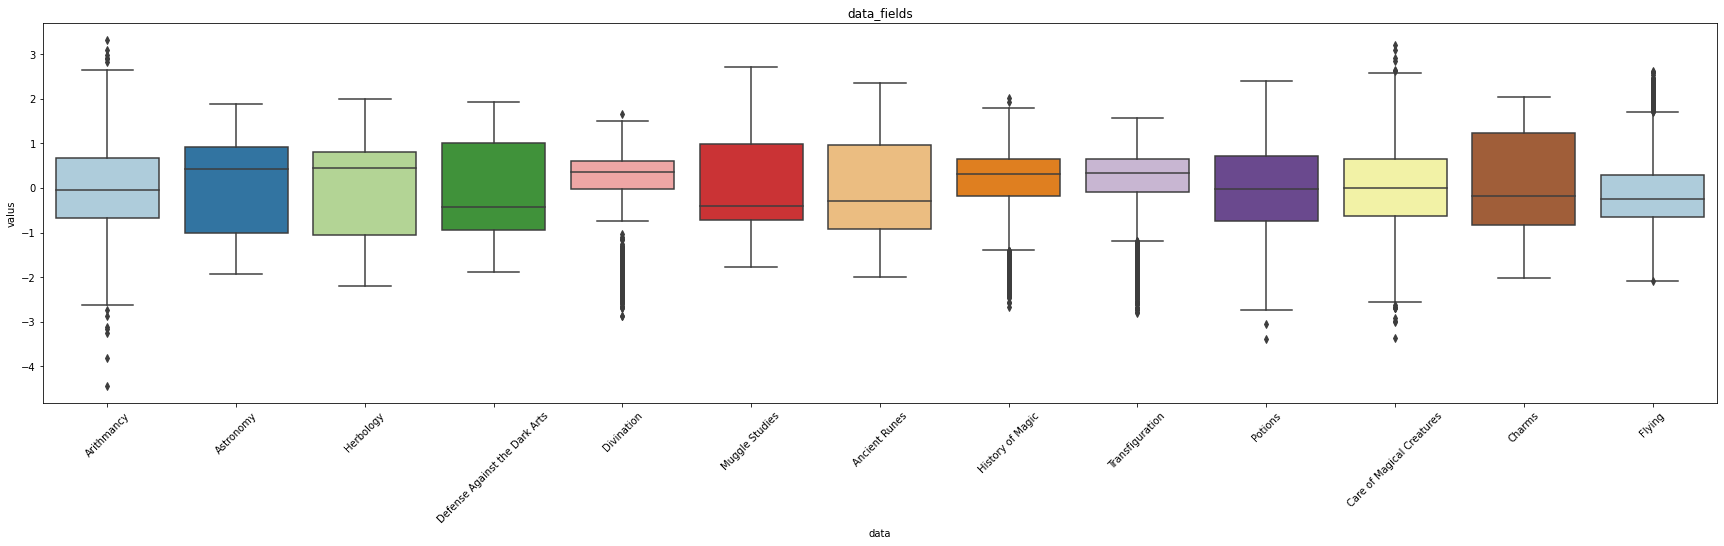

In [ ]:
import scipy
from scipy import stats

plt.figure(figsize = (30, 7))

df2 = df.copy()

#숫자 컬럼을 nan 생략후 표준정규분포 값으로 변경하여 평균0을 중심으로 표준편차를 boxplot
for col in data_cols:
    if (df[col].dtypes == "float64"):
      df2[col] = stats.zscore(df[col], nan_policy='omit')

#df2.head()

ax = sns.boxplot(data=df2[data_cols], palette = 'Paired')
ax.set(xlabel="data", ylabel="valus",title='data_fields')
plt.xticks(rotation=45)

##2-2. 하우스별 분포 확인

In [ ]:

df3 = df2.copy()
#'Hogwarts House'
labels = df3[label[0]].unique()
print(labels) #['Ravenclaw' 'Slytherin' 'Gryffindor' 'Hufflepuff']
print(df3.columns)

#성 (가문) 정보는 하우스 분류에 의미있을까? 현재는 Sirname 사용안하고 있음
df3['Last Name'] = pd.Categorical(df3["Last Name"])
#df3['Sirname'] = df3['Last Name'].cat.codes

#생년월일 정보는 하우스 분류에 의미있을까? 태어난 달 정보 사용함 
df3[["day", "month", "year"]] = df3["Birthday"].str.split("-", expand = True)
df3['month'] = pd.Categorical(df3["month"])
df3['Birth Month'] = df3['month'].cat.codes
#boxplot y축 맞춰주기 위함
df3['Birth Month'] = stats.zscore(df3['Birth Month'], nan_policy='omit')

#오른손 잡이인지 왼손 잡이인지는 하우스 분류에 의미가 있을가? 사용함
df3['Best Hand'] = pd.Categorical(df3["Best Hand"])
df3['Hand'] = df3['Best Hand'].cat.codes

#하우스 컬럼을 label 컬럼으로, 각 하우스 이름 문자열에서 0, 1, 2, 3 숫자로
df3['Hogwarts House'] = pd.Categorical(df3["Hogwarts House"])
df3['label'] = df3['Hogwarts House'].cat.codes

print(labels)
print(df3['Hogwarts House'].cat) #Categories (4, object): ['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin']

#필요없는 컬럼들 삭제후, 모델링에 사용할 독립변수 X만 컬럼들과 종속변수 y (label)컬럼만 존재하는 데이터 프레임 생성
df4=df3.drop(columns=['Index', 'First Name', 'Last Name', 'Birthday', 'day', 'month', 'year', 'Best Hand', 'Hogwarts House'])
df4.head()

len_of_data_cols = 0
data_cols.clear()
for col in df4.columns:
    if(col != 'label'):
      data_cols.append(col)
      len_of_data_cols += 1
print('data_cols : ',data_cols)
print(len_of_data_cols)

#전체 데이터에서 하우스별 데이터 분리하기 
g_df4 = df4[df4['label']==0]
h_df4 = df4[df4['label']==1]
r_df4 = df4[df4['label']==2]
s_df4 = df4[df4['label']==3]

#하우스별 데이터 앞부분 보기, 통계 분석
display(g_df4.head())
display(g_df4.describe())
display('--'*60)

display(h_df4.head())
display(h_df4.describe())
display('--'*60)

display(r_df4.head())
display(r_df4.describe())
display('--'*60)

display(s_df4.head())
display(s_df4.describe())
display('--'*60)


['Ravenclaw' 'Slytherin' 'Gryffindor' 'Hufflepuff']
Index(['Index', 'Hogwarts House', 'First Name', 'Last Name', 'Birthday',
       'Best Hand', 'Arithmancy', 'Astronomy', 'Herbology',
       'Defense Against the Dark Arts', 'Divination', 'Muggle Studies',
       'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions',
       'Care of Magical Creatures', 'Charms', 'Flying'],
      dtype='object')
['Ravenclaw' 'Slytherin' 'Gryffindor' 'Hufflepuff']
data_cols :  ['Arithmancy', 'Astronomy', 'Herbology', 'Defense Against the Dark Arts', 'Divination', 'Muggle Studies', 'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions', 'Care of Magical Creatures', 'Charms', 'Flying', 'Birth Month', 'Hand']
15


,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying,Birth Month,Hand,label
3,-1.01758,1.26496,-1.46382,-1.26452,0.20994,-0.64257,0.26573,-1.75681,-2.48703,-1.62971,0.04056,-1.53428,1.83074,0.43046,0,0
4,0.63111,0.76323,-1.71744,NaN,-0.22097,-0.45183,0.97483,-1.44823,-2.10066,-0.52094,-0.21690,-1.48196,1.39365,0.72317,0,0
6,-0.02804,1.13096,-1.15044,-1.13077,NaN,-1.44450,0.82817,-2.32476,-2.41566,-1.36762,0.21258,-1.64676,2.45481,0.72317,0,0
8,-1.76057,0.87785,-1.21826,-0.87814,0.65024,-0.82676,0.67853,-2.07076,-2.37676,-1.54563,1.23613,-1.01370,2.27612,1.60129,0,0
16,-0.46344,0.82836,-1.27621,-0.82874,0.30599,-0.43132,0.94928,-1.61039,-1.42534,-0.29330,-1.11469,-1.01345,1.56056,0.72317,0,0


,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying,Birth Month,Hand,label
count,318.00000,323.00000,320.00000,321.00000,321.00000,317.00000,320.00000,319.00000,320.00000,323.00000,323.00000,327.00000,327.00000,327.00000,327.00000,327.00000
mean,-0.03074,0.87197,-1.13547,-0.87508,0.42067,-0.56952,0.95233,-1.75801,-1.79008,-0.95722,-0.08831,-1.06557,1.71173,-0.02784,0.48624,0.00000
std,0.91112,0.37608,0.43172,0.37450,0.35020,0.47769,0.35532,0.48589,0.54428,0.68141,1.01776,0.43821,0.45989,1.02021,0.50058,0.00000
min,-3.24601,-1.27414,-1.97076,-1.87565,-0.74673,-1.68529,-1.12168,-2.67205,-2.79907,-2.66071,-3.35712,-2.01284,-0.62528,-1.61849,0.00000,0.00000
25%,-0.69470,0.70641,-1.39582,-1.11898,0.20103,-0.86829,0.75710,-2.03297,-2.08411,-1.43140,-0.70451,-1.29146,1.47280,-1.03308,0.00000,0.00000
50%,-0.07200,0.89318,-1.18095,-0.89395,0.41962,-0.58665,0.94901,-1.82474,-1.85112,-1.01406,-0.06393,-1.10025,1.77090,-0.15495,0.00000,0.00000
75%,0.62883,1.12364,-0.93581,-0.71051,0.62208,-0.29887,1.18112,-1.57771,-1.56380,-0.48655,0.60376,-0.90548,2.00000,1.01588,1.00000,0.00000
max,2.51759,1.87724,1.24575,1.26980,1.65579,1.49867,1.89083,1.57102,1.09620,1.86771,2.54314,1.43651,2.63431,1.60129,1.00000,0.00000


'------------------------------------------------------------------------------------------------------------------------'

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying,Birth Month,Hand,label
7,-0.99701,0.71446,0.91813,-0.71506,-0.09266,-0.57062,-0.53079,NaN,0.24926,0.20065,-0.12179,-0.07522,0.51528,0.13776,1,1
9,-0.19902,0.93706,1.29957,-0.93724,0.04865,-0.35688,-1.45196,0.45555,0.25657,-1.23347,-0.49030,-0.13676,-0.22590,1.01588,1,1
10,-0.84054,1.08653,0.83234,-1.08642,0.53060,-0.62981,-0.10235,0.61852,0.14029,1.06226,-0.45629,0.07775,0.43700,-0.44766,1,1
11,-0.18499,0.76665,0.80097,-0.76715,-0.03368,-0.60464,-0.74055,0.41551,0.37780,0.13556,-0.89195,-0.17527,-0.01330,-1.32578,0,1
12,-1.37861,1.28678,0.10816,-1.28630,0.94779,-0.21416,-0.56701,0.75436,0.15713,0.68637,-0.91203,-0.07166,-0.14752,-1.03308,1,1


,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying,Birth Month,Hand,label
count,522.00000,517.00000,519.00000,518.00000,516.00000,523.00000,516.00000,513.00000,522.00000,515.00000,515.00000,529.00000,529.00000,529.00000,529.00000,529.00000
mean,0.03685,0.88037,0.72410,-0.88154,0.44963,-0.56307,-0.89976,0.46271,0.44128,-0.31450,0.02572,-0.11080,-0.29758,0.05697,0.50284,1.00000
std,0.92971,0.31651,0.36252,0.31521,0.36470,0.36925,0.38968,0.51303,0.38751,0.79471,1.00520,0.20494,0.46537,0.99080,0.50047,0.00000
min,-2.87023,-1.17449,-1.36066,-1.78816,-2.01371,-1.77278,-1.99413,-2.17322,-2.49065,-3.38365,-2.68952,-1.45368,-1.71666,-1.61849,0.00000,1.00000
25%,-0.59493,0.70179,0.50041,-1.08406,0.20109,-0.80263,-1.14188,0.15737,0.20280,-0.82533,-0.55614,-0.22915,-0.63133,-0.74037,0.00000,1.00000
50%,-0.00699,0.89570,0.73353,-0.89768,0.45417,-0.56461,-0.90498,0.44963,0.45079,-0.29966,0.07391,-0.10917,-0.31186,0.13776,1.00000,1.00000
75%,0.65609,1.08601,0.94792,-0.70388,0.69965,-0.31907,-0.66369,0.76218,0.69139,0.19606,0.69420,0.01110,0.01139,1.01588,1.00000,1.00000
max,2.90237,1.78958,2.00687,1.17034,1.50870,1.48691,1.16475,2.01761,1.56109,2.16388,2.92020,1.58699,2.16393,1.60129,1.00000,1.00000


'------------------------------------------------------------------------------------------------------------------------'

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying,Birth Month,Hand,label
0,0.52472,-1.01452,0.87891,1.01067,0.37749,1.02147,0.34575,0.51261,0.21970,-0.68640,0.79223,1.20493,-0.50049,-1.03308,0,2
2,-1.55523,-0.78033,1.26178,0.77692,0.71885,1.82950,1.00552,0.13391,1.31467,0.88284,-0.47562,1.82575,0.08670,1.30859,0,2
14,-0.29048,-0.45628,0.30690,0.45348,0.83031,1.54661,1.03380,0.56890,0.75776,1.09859,-1.09069,1.22024,-0.42928,-1.03308,1,2
15,-1.67949,-0.93716,0.55686,0.93346,0.43214,2.12827,1.12736,0.15605,1.03731,1.16705,0.63896,1.59347,-0.05080,1.01588,0,2
18,-2.04244,-0.36699,1.09828,0.36436,1.14399,1.78950,1.05123,0.75816,1.38192,1.82989,0.32331,1.89109,-0.11002,-1.03308,1,2


,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying,Birth Month,Hand,label
count,431.00000,434.00000,433.00000,435.00000,433.00000,429.00000,436.00000,432.00000,433.00000,438.00000,431.00000,443.00000,443.00000,443.00000,443.00000,443.00000
mean,-0.01129,-0.99944,0.74374,0.99901,0.44150,1.46795,0.96001,0.44139,0.45878,0.32478,0.05903,1.40007,-0.26575,0.00032,0.51919,2.00000
std,1.14231,0.35419,0.35878,0.35361,0.34959,0.47646,0.38168,0.35263,0.37071,0.72237,1.00255,0.34014,0.37025,1.01055,0.50020,0.00000
min,-4.43819,-1.93516,-1.49728,-1.20986,-2.47448,-1.15750,-1.38928,-2.34933,-1.70301,-1.85390,-2.91108,-1.43408,-1.45888,-1.61849,0.00000,2.00000
25%,-0.75061,-1.20085,0.51478,0.83559,0.24316,1.24992,0.77345,0.25021,0.25926,-0.17173,-0.67980,1.31514,-0.50346,-1.03308,0.00000,2.00000
50%,0.04752,-1.02689,0.74925,1.02557,0.44177,1.50109,0.98550,0.44359,0.43612,0.35095,0.06208,1.44218,-0.24260,0.13776,1.00000,2.00000
75%,0.75534,-0.83039,0.97219,1.19790,0.65482,1.74310,1.17060,0.64977,0.69165,0.80361,0.74725,1.54928,-0.03610,1.01588,1.00000,2.00000
max,3.31773,1.21020,1.60001,1.92957,1.23980,2.70878,2.34960,1.51196,1.43304,2.18625,3.20238,1.96400,2.13534,1.60129,1.00000,2.00000


'------------------------------------------------------------------------------------------------------------------------'

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying,Birth Month,Hand,label
1,1.05577,-1.13790,-1.36613,1.13382,-2.11025,-0.54043,-1.20458,0.25859,0.65398,0.41259,0.14941,-1.00330,-1.38736,1.01588,1,3
5,-1.70474,-1.25638,-1.04067,1.25208,-2.34617,-0.44511,-0.93689,0.54634,0.51570,1.84338,1.13610,-0.52057,-0.58040,-0.74037,1,3
13,-0.69871,-1.12277,-1.61937,1.11872,-2.24699,-0.19613,-0.97971,-0.01093,1.18983,1.58839,1.88161,-0.88268,-1.04894,-1.32578,0,3
26,0.99622,-0.88212,-1.49410,0.87852,-2.20510,-0.20040,-0.81994,0.42375,0.22322,0.88618,0.07848,-1.10161,-1.16185,-1.03308,0,3
38,-0.53133,-1.26727,-1.92191,1.26295,-2.42513,-0.08851,-1.12194,0.87456,0.59079,1.82974,0.00582,-0.91087,-1.50959,0.43046,1,3


,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying,Birth Month,Hand,label
count,295.00000,294.00000,295.00000,295.00000,291.00000,296.00000,293.00000,293.00000,291.00000,294.00000,291.00000,301.00000,301.00000,301.00000,301.00000,301.00000
mean,-0.01558,-1.03076,-1.13389,1.02701,-1.91826,-0.52272,-0.88408,0.45308,0.49425,1.11870,-0.03493,-0.70822,-0.94548,-0.07035,0.51495,3.00000
std,0.99366,0.28784,0.52282,0.29072,0.53863,0.41415,0.38979,0.42815,0.39227,0.60373,0.96523,0.47247,0.41147,0.97898,0.50061,0.00000
min,-2.62111,-1.57150,-2.19177,-0.96298,-2.86013,-1.26702,-1.72158,-0.88585,-0.74833,-2.03269,-3.00643,-1.83640,-2.08428,-1.61849,0.00000,3.00000
25%,-0.69298,-1.20620,-1.44240,0.89622,-2.24602,-0.75689,-1.11299,0.16017,0.27577,0.72242,-0.63909,-0.99343,-1.23163,-1.03308,0.00000,3.00000
50%,-0.05047,-1.05293,-1.18076,1.04746,-1.98772,-0.55791,-0.91223,0.43838,0.50299,1.14163,-0.04691,-0.76549,-0.97855,-0.15495,1.00000,3.00000
75%,0.61798,-0.90938,-0.88566,1.20228,-1.68716,-0.36533,-0.71319,0.74455,0.75483,1.50215,0.59150,-0.47167,-0.63747,0.72317,1.00000,3.00000
max,2.90710,0.96286,1.75464,1.57891,1.01279,2.40627,1.36578,1.77097,1.45913,2.41079,2.64220,2.04379,0.34971,1.60129,1.00000,3.00000


'------------------------------------------------------------------------------------------------------------------------'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

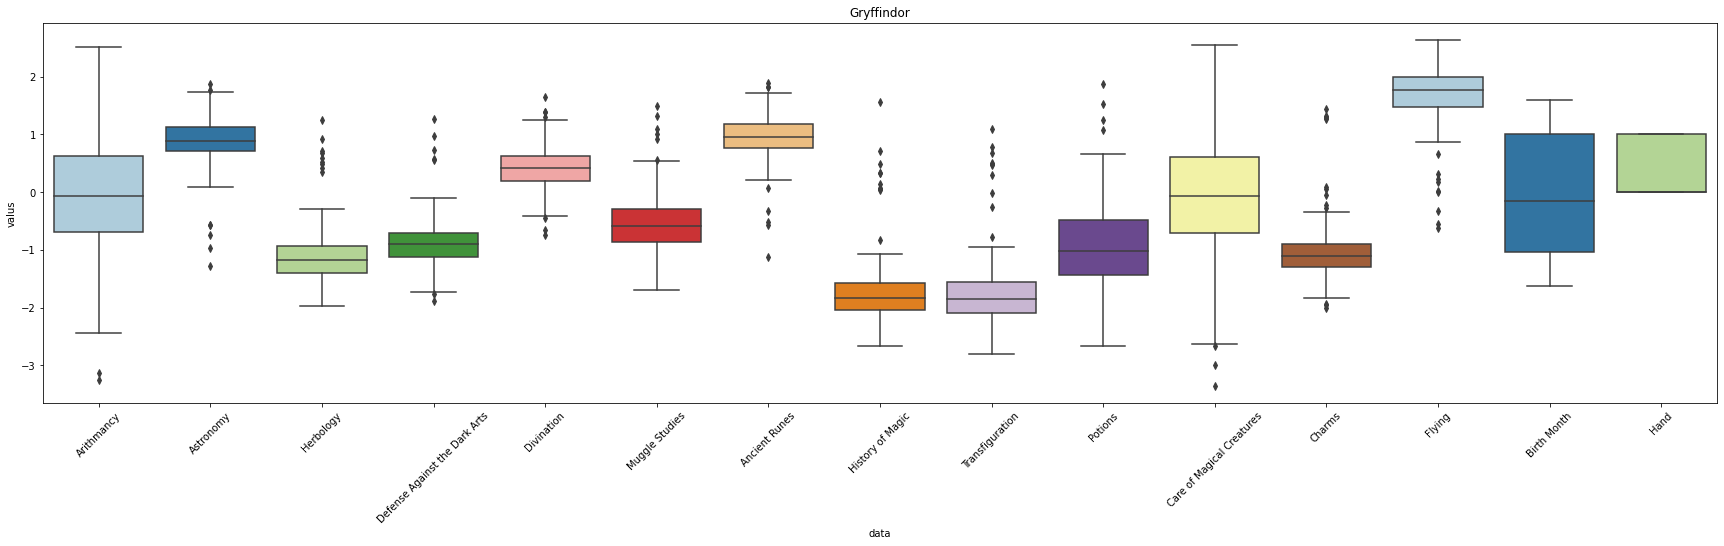

In [ ]:
# 하우스별 boxplot
# Categories (4, object): ['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin']

# Gryffindor 의 boxplot
plt.figure(figsize = (30, 7))
ax = sns.boxplot(data=g_df4[data_cols], palette = 'Paired')
ax.set(xlabel="data", ylabel="valus",title='Gryffindor')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

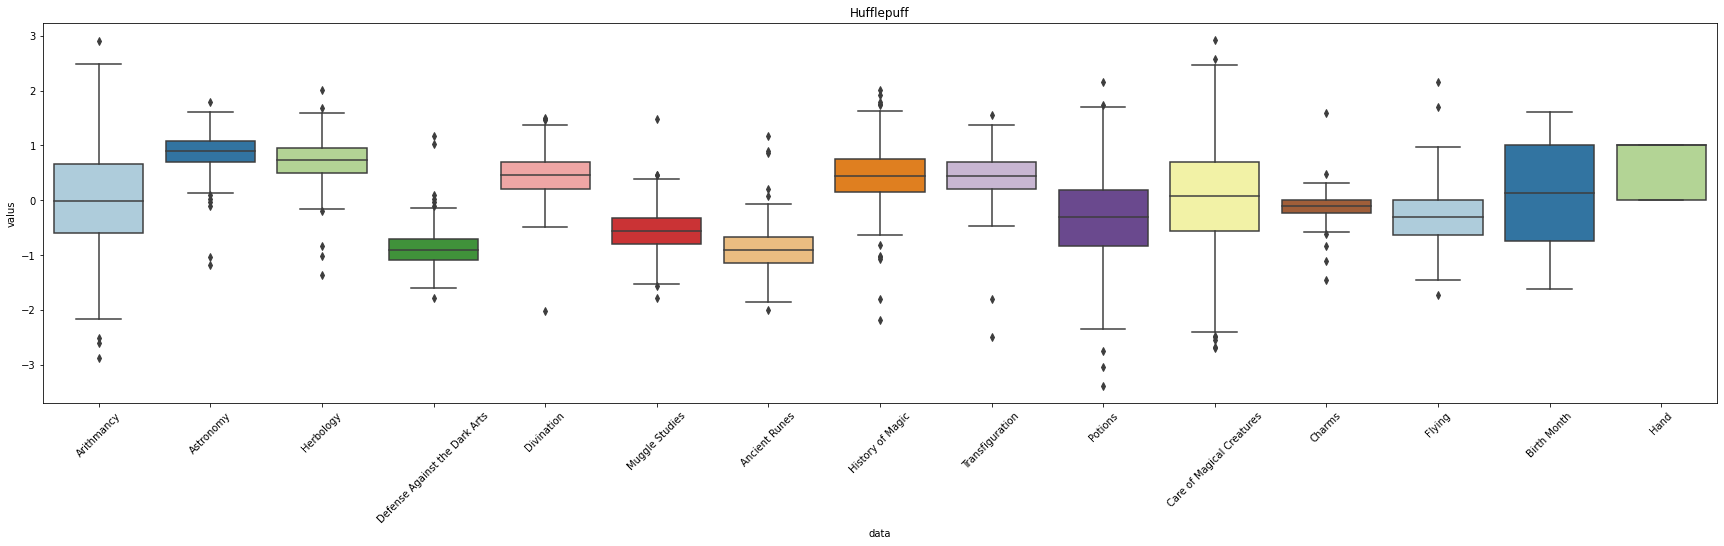

In [ ]:
##Categories (4, object): ['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin']
# Hufflepuff 의 boxplot
plt.figure(figsize = (30, 7))
ax = sns.boxplot(data=h_df4[data_cols], palette = 'Paired')
ax.set(xlabel="data", ylabel="valus",title='Hufflepuff')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

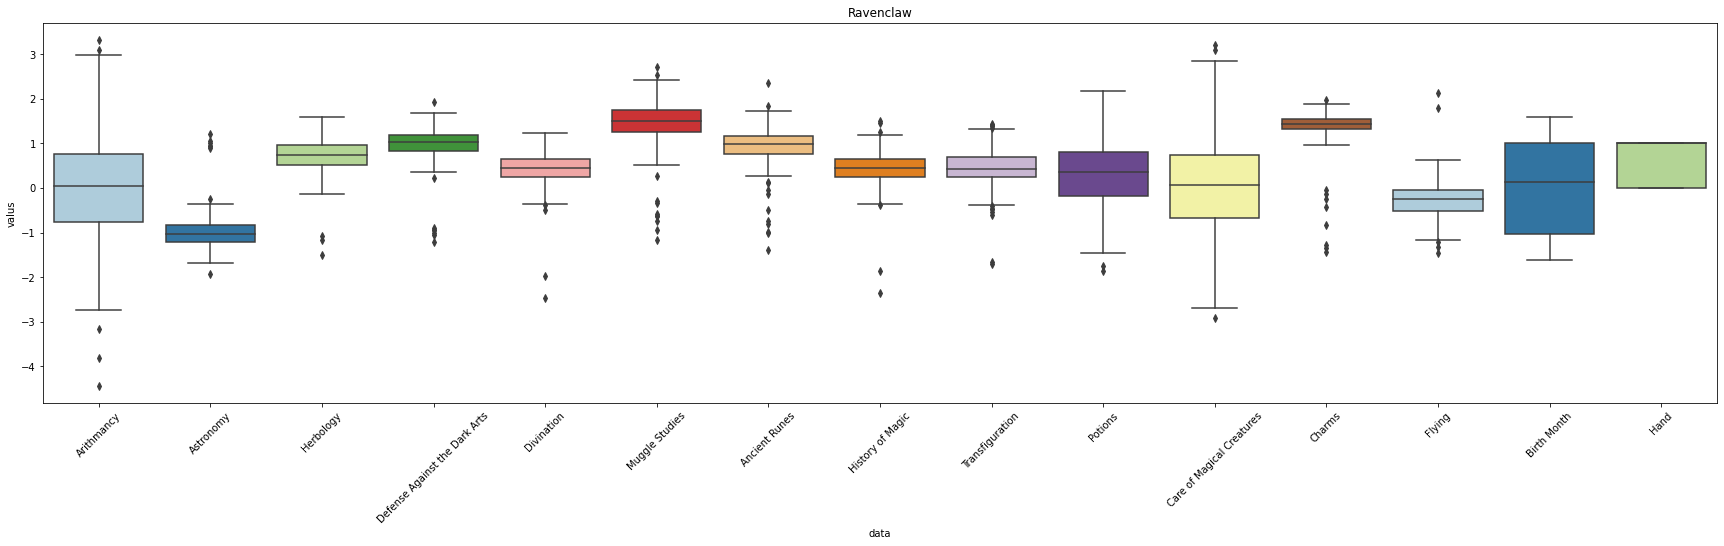

In [ ]:
##Categories (4, object): ['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin']
# Hufflepuff 의 boxplot
plt.figure(figsize = (30, 7))
ax = sns.boxplot(data=r_df4[data_cols], palette = 'Paired')
ax.set(xlabel="data", ylabel="valus",title='Ravenclaw')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

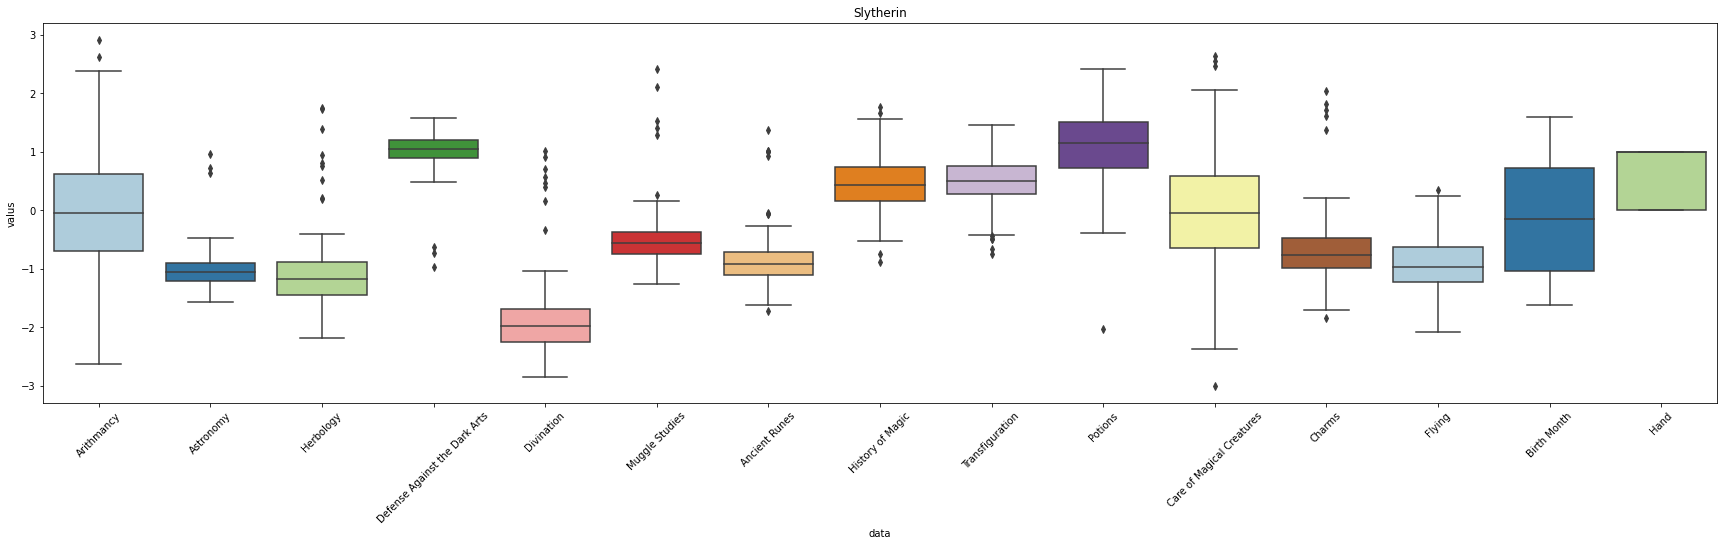

In [ ]:
##Categories (4, object): ['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin']
# Hufflepuff 의 boxplot
plt.figure(figsize = (30, 7))
ax = sns.boxplot(data=s_df4[data_cols], palette = 'Paired')
ax.set(xlabel="data", ylabel="valus",title='Slytherin')
plt.xticks(rotation=45)

# **3. 모델링 및 평가** <br>

### 3-1. 훈련, 테스트 데이터 분리

In [ ]:
#모델링 라이브러리 임포트 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [ ]:
#https://thebook.io/080223/ch04/01/03/
#NaN value 핸들링
#컬럼 별 누락된 값은 해당 컬럼의 평균값으로 대체 
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df4.values)

# 필드 정보를 뺀 데이터의 값들만 추출
#raw_data = df4.values
raw_data = imr.transform(df4.values)

# 레이블 Y값 분리 ##Categories (4, object): ['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin']
labels = raw_data[:, -1]

# 데이터 X값 분리(data_1 ~ data_10)
data_xs = raw_data[:, 0:15]

# train, test 8:2 분리 
x_train, x_test, y_train, y_test = train_test_split(data_xs, labels, test_size=0.2, random_state=22, stratify = labels)

print('x_train data shape:',x_train.shape)
print('x_test data shape:',x_test.shape)

print('y_train label shape:',y_train.shape)
print('y_test label shape:',y_test.shape)

x_train data shape: (1280, 15)
x_test data shape: (320, 15)
y_train label shape: (1280,)
y_test label shape: (320,)


In [ ]:
x_train

array([[-0.2922772 ,  0.63794383, -1.27598206, ...,  2.03555096,
         0.13775555,  0.        ],
       [-0.14834467,  0.67190388,  1.20011839, ...,  0.33464778,
         0.13775555,  0.        ],
       [ 0.85696406,  0.41183689,  0.95779423, ...,  0.0077047 ,
         1.60129393,  1.        ],
       ...,
       [ 0.88886911, -1.05907496,  0.35426019, ..., -0.25069406,
         0.13775555,  1.        ],
       [-0.24136107,  1.40352645,  0.41774424, ...,  0.10391265,
         0.7231709 ,  0.        ],
       [-0.01334796,  0.98749267,  1.49227578, ...,  0.30380796,
         1.60129393,  0.        ]])

* 데이터 정규화

>모델의 학습성능을 높이기 위하여 일정한 범위 [0,1] 로 정규화.





In [ ]:
# MinMax 스케일링
scaler = MinMaxScaler()
train_data = scaler.fit_transform(x_train)
test_data = scaler.transform(x_test)


In [ ]:
display(x_train)
display('--------------'*10)
display(x_test)

array([[-0.2922772 ,  0.63794383, -1.27598206, ...,  2.03555096,
         0.13775555,  0.        ],
       [-0.14834467,  0.67190388,  1.20011839, ...,  0.33464778,
         0.13775555,  0.        ],
       [ 0.85696406,  0.41183689,  0.95779423, ...,  0.0077047 ,
         1.60129393,  1.        ],
       ...,
       [ 0.88886911, -1.05907496,  0.35426019, ..., -0.25069406,
         0.13775555,  1.        ],
       [-0.24136107,  1.40352645,  0.41774424, ...,  0.10391265,
         0.7231709 ,  0.        ],
       [-0.01334796,  0.98749267,  1.49227578, ...,  0.30380796,
         1.60129393,  0.        ]])

'--------------------------------------------------------------------------------------------------------------------------------------------'

array([[-0.17569185, -1.1340795 ,  0.90780724, ..., -0.207047  ,
        -1.03307515,  1.        ],
       [-0.67171933,  1.15550764,  0.80051473, ..., -0.46821212,
         0.43046323,  0.        ],
       [-2.43135446, -1.45148183, -1.421299  , ..., -1.12015158,
        -0.4476598 ,  1.        ],
       ...,
       [ 1.02296624,  0.40069454,  0.74666031, ..., -0.42005692,
        -1.61849051,  0.        ],
       [-0.4599586 , -1.21445193,  1.04686629, ..., -0.19874791,
        -0.74036748,  0.        ],
       [ 1.41164404,  0.299569  ,  0.6217739 , ..., -0.77312676,
         0.43046323,  1.        ]])

##3-2.모델 학습 및 평가

In [ ]:
#모델 임포트 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

###3-2.1 로지스틱 리그레션 


In [ ]:
#로지스틱 회귀모델 훈련 
lr = LogisticRegression(random_state=1234)
lr.fit(x_train, y_train)

LogisticRegression(random_state=1234)

In [ ]:
y_pred_train = lr.predict(x_train)

In [ ]:
lr_train_report =  classification_report(y_train, y_pred_train)
print(lr_train_report)

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       262
         1.0       0.98      0.99      0.98       423
         2.0       0.97      0.98      0.98       354
         3.0       0.99      0.97      0.98       241

    accuracy                           0.98      1280
   macro avg       0.98      0.98      0.98      1280
weighted avg       0.98      0.98      0.98      1280



###3-2.2 SVM

In [ ]:
svc = SVC(random_state=1234)
svc.fit(x_train, y_train)

SVC(random_state=1234)

In [ ]:
y_pred_train = svc.predict(x_train)

In [ ]:
sv_train_report =  classification_report(y_train, y_pred_train)

print(sv_train_report)

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       262
         1.0       0.98      0.99      0.98       423
         2.0       0.97      0.98      0.98       354
         3.0       0.99      0.97      0.98       241

    accuracy                           0.98      1280
   macro avg       0.98      0.98      0.98      1280
weighted avg       0.98      0.98      0.98      1280



###3-2.3 랜덤포레스트

In [ ]:
rfc = RandomForestClassifier(random_state=1234)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=1234)

In [ ]:
#예측 
y_pred_train = rfc.predict(x_train)

In [ ]:
rf_train_report =  classification_report(y_train, y_pred_train)

print(rf_train_report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       262
         1.0       1.00      1.00      1.00       423
         2.0       1.00      1.00      1.00       354
         3.0       1.00      1.00      1.00       241

    accuracy                           1.00      1280
   macro avg       1.00      1.00      1.00      1280
weighted avg       1.00      1.00      1.00      1280



#4.모델 평가

##4.1 모델 예측

In [ ]:
y_pred_test = lr.predict(x_test)
#print(y_pred_test)

lr_test_report = classification_report(y_test, y_pred_test)
print(lr_test_report)


              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        65
         1.0       0.98      1.00      0.99       106
         2.0       0.99      0.99      0.99        89
         3.0       1.00      1.00      1.00        60

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320



In [ ]:
y_pred_test = svc.predict(x_test)
sv_test_report = classification_report(y_test, y_pred_test)
print('**'*50)
print(sv_test_report)


****************************************************************************************************
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        65
         1.0       0.98      1.00      0.99       106
         2.0       0.99      0.99      0.99        89
         3.0       1.00      1.00      1.00        60

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320



In [ ]:
y_pred_test = rfc.predict(x_test)
rf_test_report = classification_report(y_test, y_pred_test)
print('**'*50)
print(rf_test_report)


****************************************************************************************************
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        65
         1.0       0.98      1.00      0.99       106
         2.0       0.99      0.99      0.99        89
         3.0       1.00      1.00      1.00        60

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320



##4.2 모델 성능 비교

In [ ]:
print('############## 모델 성능 비교 ##############') 
print('############## 1. 로지스틱 회귀 ##############')
print(lr_test_report)

print('############## 2. SVM ##############')
print(sv_test_report)

print('############## 3. RandomForest ##############')
print(rf_test_report)


############## 모델 성능 비교 ##############
############## 1. 로지스틱 회귀 ##############
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        65
         1.0       0.98      1.00      0.99       106
         2.0       0.99      0.99      0.99        89
         3.0       1.00      1.00      1.00        60

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320

############## 2. SVM ##############
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        65
         1.0       0.98      1.00      0.99       106
         2.0       0.99      0.99      0.99        89
         3.0       1.00      1.00      1.00        60

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320

#############

##4.3 Random Forest 모델 하이퍼파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [400,500], 
    'max_depth' : [6, 8, 10, 12]
}

rf_clf = RandomForestClassifier(random_state=1234, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1, scoring='accuracy')
grid_cv.fit(x_train, y_train)


print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 6, 'n_estimators': 400}
최고 예측 정확도: 0.9797


In [ ]:
# ▶ Best score 파라미터로 다시 재학습
rfc = RandomForestClassifier(n_estimators=400, max_depth=6, random_state = 1234)
rfc.fit(x_train, y_train)

# ▶ 예측
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)


rf_train_report =  classification_report(y_train, y_pred_train)
rf_test_report = classification_report(y_test, y_pred_test)


In [ ]:
rf_train_report =  classification_report(y_train, y_pred_train)
rf_test_report = classification_report(y_test, y_pred_test)

print(rf_train_report)
print('**'*50)
print(rf_test_report)

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       262
         1.0       0.98      0.99      0.99       423
         2.0       0.98      0.99      0.98       354
         3.0       0.99      0.98      0.98       241

    accuracy                           0.98      1280
   macro avg       0.99      0.98      0.98      1280
weighted avg       0.98      0.98      0.98      1280

****************************************************************************************************
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        65
         1.0       0.98      1.00      0.99       106
         2.0       0.99      0.99      0.99        89
         3.0       1.00      1.00      1.00        60

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320



##4.4 모델 성능 재비교

In [ ]:
print('############## 모델 성능 비교 ##############') 
print('############## 1. 로지스틱 회귀 ##############')
print(lr_test_report)

print('############## 2. SVM ##############')
print(sv_test_report)

print('############## 3. RandomForest ##############')
print(rf_test_report)


############## 모델 성능 비교 ##############
############## 1. 로지스틱 회귀 ##############
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        65
         1.0       0.98      1.00      0.99       106
         2.0       0.99      0.99      0.99        89
         3.0       1.00      1.00      1.00        60

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320

############## 2. SVM ##############
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        65
         1.0       0.98      1.00      0.99       106
         2.0       0.99      0.99      0.99        89
         3.0       1.00      1.00      1.00        60

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320

#############